# Exploratory Analysis: Week 1-3
### The goal of this notebook is to have a thorough view of our dataset before building any models. 
### Our dataset can be found here: https://www.kaggle.com/snap/amazon-fine-food-reviews
### Order:
1. General, descriptive statistics.
2. Visualizations/Correlation Matrix.
3. Getting rid of duplicates.
4. Word clouds.
5. 


### Descriptive Statistics
Let us start by importing the toolkits we will need

In [1]:
!pip3 install pandas --user
!pip3 install matplotlib.pyplot --user
!pip3 install seaborn --user
!pip3 install Pillow --user
!pip3 install wordcloud --user
!pip3 install nltk --user
!pip install -U scikit-learn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Requirement already up-to-date: scikit-learn in /Users/nicolasdecavel/opt/anaconda3/lib/python3.7/site-packages (0.22.1)


In [2]:
!python --version

Python 3.7.4


In [3]:
# !cd /Library/Python
# !brew install python

In [4]:
!ls /Library/Python

2.6 2.7


In [5]:
# Lets start by importing everything we think we might need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#WORD CLOUD
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
#
import nltk
# from sklearn import tree

In [6]:
# Extract the csv and look at the first 5 entries
reviews = pd.read_csv("../amazon-fine-food-reviews/Reviews.csv")
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
# Check out descriptive statistics and general column info
reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
reviews.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Although we have a few null values, it is not pertinent to remove them at this time. 

In [10]:
reviews.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

### First Look at Data:
1. ID: Every review has a unique ID, giving us a total count of **568,454** reviews. This is an int.
2. ProductID: There are **74,258** unique products. The productID is a string that includes capital letters and nums.
3. UserID: There are a total of **256,059** user. This column is a string that includes capital letters and numbers.
4. ProfileName: There are **16** instances with **NaN** ProfileNames, leaving us with **218,416** unique profiles. This is a string that the user creates.
5. HelpfulnessNumerator: Int that represents how many people found the review helpful.
6. HelpfulnessDenominator: Int that represents how many people didn't find the review helpful.
7. Score: Review from 1-5 (1: Poor, 5: Excellent)
8. Summary: String that represents the subject line of their review. **27 null cells**.
9. Text: Contains full review text, although the display will show an "..." to represent that it doesn't show the entire text.

### To begin our visualizations, I would like to first look more into the relationship each review has with time submission.
- Note, my interest stems with the initial viewing seeming to only include 5 pm and 4 pm.

In [11]:
import datetime
reviews['Time'] = reviews['Time'].apply(datetime.datetime.fromtimestamp)

In [12]:
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-26 17:00:00,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-06 17:00:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-17 17:00:00,"""Delight"" says it all",This is a confection that has been around a fe...


In [13]:
# On first glance, it looks like the Time stamp varies between 5 pm and 4 pm. Let's visualize
reviews['Hour'] = reviews['Time'].apply(lambda x: x.hour)
reviews['Weekday'] = reviews['Time'].apply(lambda x: x.dayofweek)
reviews['Day'] = reviews['Time'].apply(lambda x: x.dayofyear)
reviews['Year'] = reviews['Time'].apply(lambda x: x.year)

(array([185934.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 382520.]),
 array([16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. ]),
 <a list of 10 Patch objects>)

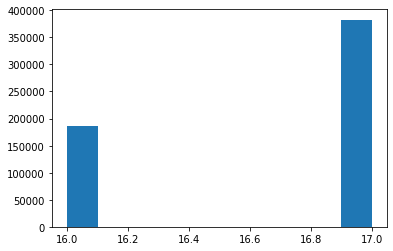

In [14]:
plt.hist(reviews['Hour'])

(array([3.8000e+01, 1.3000e+01, 7.3000e+01, 6.9300e+02, 1.3440e+03,
        6.6860e+03, 5.6502e+04, 5.5403e+04, 8.6092e+04, 3.6161e+05]),
 array([1999. , 2000.3, 2001.6, 2002.9, 2004.2, 2005.5, 2006.8, 2008.1,
        2009.4, 2010.7, 2012. ]),
 <a list of 10 Patch objects>)

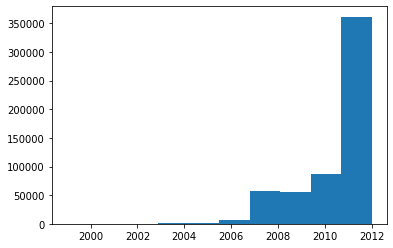

In [15]:
plt.hist(reviews['Year'])

In [16]:
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-26 17:00:00,Good Quality Dog Food,I have bought several of the Vitality canned d...,17,1,116,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-06 17:00:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,17,3,250,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-17 17:00:00,"""Delight"" says it all",This is a confection that has been around a fe...,17,6,230,2008


In [17]:
reviews.groupby('Hour').mean()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Weekday,Day,Year
Hour,,,,,,,
16,284114.073784,2.023546,2.569035,4.175638,2.932100,154.615563,2010.335463
17,284282.633823,1.607848,2.063435,4.186874,2.919868,194.052094,2010.699814


There are 185934 entries submitted at 4 pm, and 382520 entries submitted at 5 pm.


(array([1.60000e+01, 1.10000e+01, 1.90000e+01, 3.74000e+02, 7.74000e+02,
        3.67200e+03, 3.43250e+04, 3.55260e+04, 5.34210e+04, 2.54382e+05]),
 array([1999. , 2000.3, 2001.6, 2002.9, 2004.2, 2005.5, 2006.8, 2008.1,
        2009.4, 2010.7, 2012. ]),
 <a list of 10 Patch objects>)

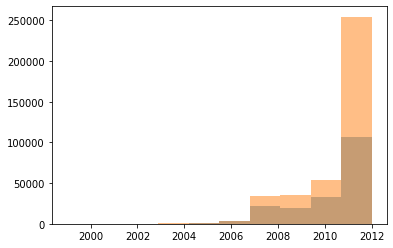

In [18]:
hour16 = reviews[reviews.Hour == 16]
hour17 = reviews[reviews.Hour == 17]
print("There are",hour16.shape[0],"entries submitted at 4 pm, and", hour17.shape[0], "entries submitted at 5 pm.")
plt.hist(hour16.Year,alpha = 0.5)
plt.hist(hour17.Year, alpha = 0.5)

(array([32398., 35691., 36064., 36609., 35963., 38045., 40334., 44142.,
        44595., 38679.]),
 array([ 67. ,  91.3, 115.6, 139.9, 164.2, 188.5, 212.8, 237.1, 261.4,
        285.7, 310. ]),
 <a list of 10 Patch objects>)

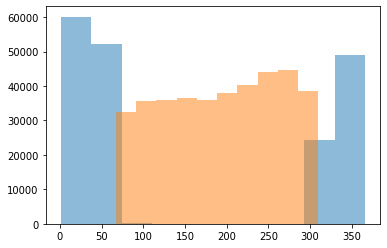

In [19]:
plt.hist(hour16.Day,alpha = 0.5)
plt.hist(hour17.Day, alpha = 0.5)

- Interestingly enough, the time of the review submission seems to be only related with the time of year, as shown above. Although this will not impact our models, it is important to understand the data collection methodology.

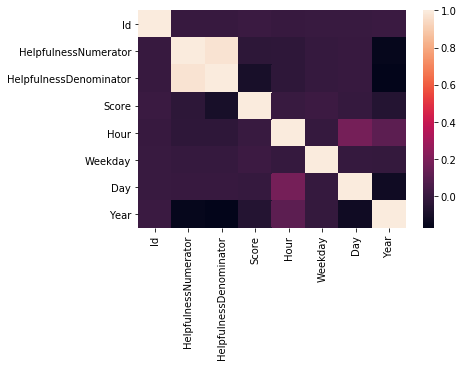

In [20]:
%matplotlib inline

# calculate the correlation matrix
corr = reviews.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1256c5eb8>]],
      dtype=object)

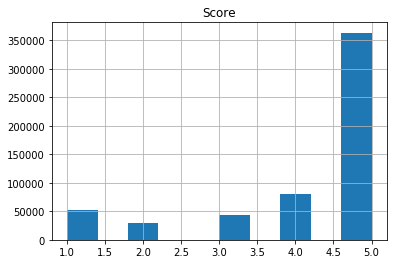

In [21]:
reviews.hist('Score')

### Next, we will look try to identify duplicates within the dataset

In [22]:
entriesWithDuplicates = reviews[reviews.duplicated(['UserId','ProductId','Score','Text'],keep = False)]
print(entriesWithDuplicates.shape)
entriesWithDuplicates.head(3)

(2082, 14)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,6,11,2009
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,6,11,2009
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2008-12-15 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,0,350,2008


In [23]:
reviews[reviews['UserId'] == 'A3PJZ8TU8FDQ1K']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,6,11,2009
467,468,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2009-01-11 16:00:00,"Crunchy, salty, sweet...finally, a Superbowl s...",These Honey Dijon chips bring a terrific balan...,16,6,11,2009
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,6,11,2009
602,603,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2009-03-14 17:00:00,"One bite and you'll become a ""chippoisseur""","As an Oregonian, I make a point of sharing the...",17,5,73,2009
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2008-12-15 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,0,350,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550446,550447,B001SAXPEO,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2009-03-14 17:00:00,"One bite and you'll become a ""chippoisseur""","As an Oregonian, I make a point of sharing the...",17,5,73,2009
550447,550448,B001SAXPEO,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2008-12-15 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,0,350,2008
552295,552296,B001EO664K,A3PJZ8TU8FDQ1K,Jared Castle,0,1,3,2011-08-25 17:00:00,"Variety may be the spice of life, but it certa...",We've had such good fortune with Green Mountai...,17,3,237,2011
557500,557501,B003YBLF2E,A3PJZ8TU8FDQ1K,Jared Castle,0,1,5,2011-04-13 17:00:00,"Healthy, handy and tasty. Lunch for those on t...",At 410 calories with no trans fat and 22 grams...,17,2,103,2011


A couple things to note from the above output:
1. The user has, on multiple occassions, written multiple reviews for the same ProductId.
2. In addition, this user has written the same 5 reviews for a handful of different productIds.
3. Let's look more into some of the products with the same reviews: (B000G6RYNE, B0058AMY74, B0012XBD7I, B000LKVD5U, B006WYSFZK, B004728MI4, B001SAXPEO)

In [24]:
potentialDupeProducts = ['B000G6RYNE', 'B0058AMY74', 'B0012XBD7I', 'B000LKVD5U', 'B006WYSFZK', 'B004728MI4']


In [25]:
def frequencies(values):
    frequencies = {}
    for v in values:
        if v in frequencies:
            frequencies[v] += 1
        else:
            frequencies[v] = 1
    return frequencies
def probabilities(sample, freqs):
    probs = []
    for k,v in freqs.items():
        size = len(sample)
        probs.insert(0,float(v)/size)
    return probs

B000G6RYNE
5    125
4     36
1     27
3     17
2     12
Name: Score, dtype: int64

B0058AMY74
5    125
4     36
1     27
3     17
2     12
Name: Score, dtype: int64

B0012XBD7I
5    126
4     36
1     27
3     17
2     12
Name: Score, dtype: int64

B000LKVD5U
5    125
4     36
1     27
3     17
2     12
Name: Score, dtype: int64

B006WYSFZK
5    126
4     36
1     27
3     17
2     12
Name: Score, dtype: int64

B004728MI4
5    126
4     36
1     27
3     17
2     12
Name: Score, dtype: int64



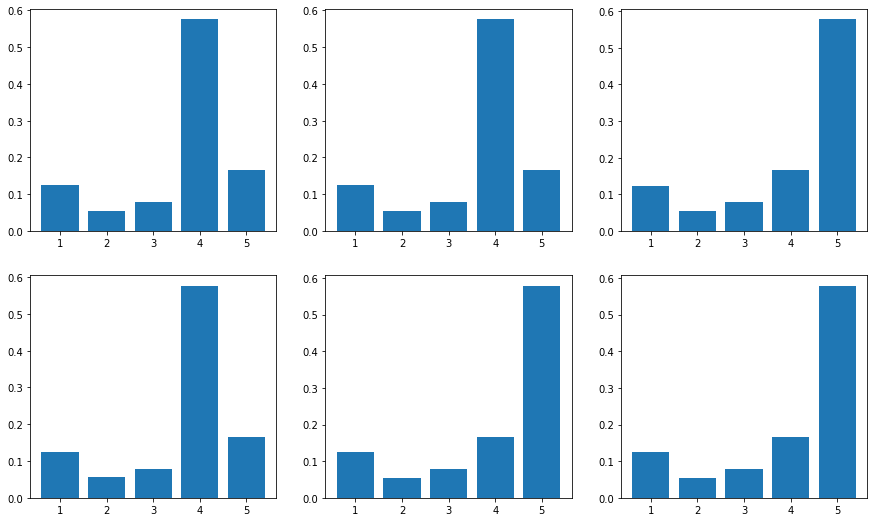

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
count = 0
for i in potentialDupeProducts:
    x = reviews[reviews['ProductId'] == i].Score
    print(i)
    print(x.value_counts())
    print('')
    freqs = frequencies(x)
    probs = probabilities(x, freqs)
    x_axis = list(set(x))
    axes[int(count / 3), int(count%3)].bar(x_axis, probs)
    count += 1

- On first glance, the above products seem to have the exact same distribution, although there are only 125 5-star reviews for 3 of the products, while there are 126 5-star reviews for the other 3.
- Now, let's look at the 2-star reviews to confirm that they are identical

In [27]:
for i in potentialDupeProducts:
    print(i)
    x = reviews[(reviews.ProductId == i) & (reviews.Score == 2)].Text
    print(x)
    print('')

B000G6RYNE
483    I like Kettle chips but was really disappointe...
487    I really love Kettle brand chips, but these ar...
490    I agree with the other review, these chips are...
501    It was a great value and I like the package si...
507    I was really looking forward to trying these c...
519    Being a salt-free product is why I purchased t...
535    Got these Kettle Chips Sea Salt & Vinegar (15 ...
546    Unless you like salt vinegar chips as salty as...
552    If you are looking for STRONG S/V flavor these...
553    I don't know if it was the case of chips we re...
593    There is nothing too good or too bad about the...
620    The Spicy Thai chips used to be the best tasti...
Name: Text, dtype: object

B0058AMY74
26058    I like Kettle chips but was really disappointe...
26062    I really love Kettle brand chips, but these ar...
26065    I agree with the other review, these chips are...
26076    It was a great value and I like the package si...
26082    I was really looking f

- It is clear that the 6 above products are all referencing the same reviews. In order to properly account for each review, we will need to join any and all products with the same reviews. **However**, we will need to account for similar products that are off by one review
- To start, let us first aggregate reviews that are by the same user, with the same product/score, for the same text.

# Week 2!

## 1. Duplicate Reviews:
    - First, get rid of duplicates with the same userId, productId, Text, and Score
    - Next, figure out how to combine different productIds that represent the same item
    

In [28]:
cleanReviews = reviews.copy()

In [29]:
columns = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Count'] # Where Count is the number of duplciates
for i in columns:
    print(i)
    if(i == 'Count'):
        cleanReviews[i] = cleanReviews.groupby(['UserId','ProductId','Summary','Text'])['Score'].transform('count')
    else:
        cleanReviews[i] = cleanReviews.groupby(['UserId','ProductId','Summary','Text'])[i].transform('mean')

# Now, remove duplicates, and keep first entry
cleanReviews.drop_duplicates(subset = ['UserId', 'ProductId', 'Summary', 'Text'], 
                     keep = 'first', inplace = True) 
print('removed',reviews.shape[0] - cleanReviews.shape[0], 'entries, leaving us with a total of:', cleanReviews.shape[0])

HelpfulnessNumerator
HelpfulnessDenominator
Score
Count
removed 898 entries, leaving us with a total of: 567556


In [30]:
# If we remove duplicates of user and reviews, that should account for almost all of them
for i in columns:
    print(i)
    if(i == 'Count'):
        cleanReviews[i] = cleanReviews.groupby(['UserId','ProductId','Summary','Text'])['Score'].transform('count')
    else:
        cleanReviews[i] = cleanReviews.groupby(['UserId','ProductId','Summary','Text'])[i].transform('mean')

# Now, remove duplicates, and keep first entry
cleanReviews.drop_duplicates(subset = ['UserId', 'Time','Summary', 'Text'], 
                     keep = 'first', inplace = True) 
print('removed',reviews.shape[0] - cleanReviews.shape[0], 'entries, leaving us with a total of:', cleanReviews.shape[0])

HelpfulnessNumerator
HelpfulnessDenominator
Score
Count
removed 173334 entries, leaving us with a total of: 395120


In [31]:
pre = reviews[reviews.duplicated(['UserId','Time','Text', 'Summary'],keep = False)]
post = cleanReviews[cleanReviews.duplicated(['UserId','Time','Text', 'Summary'],keep = False)]
print('We started with a total of', pre.shape[0], 'duplicates.')
print('After removing similar entries, our new dataset has:', post.shape[0], 'duplicates.')

We started with a total of 230670 duplicates.
After removing similar entries, our new dataset has: 0 duplicates.


- Okay, we got rid of a lot of reviews. Let's look at the original 6 we were interested in

B000G6RYNE
5.0    123
4.0     36
1.0     27
3.0     17
2.0     12
Name: Score, dtype: int64

B0058AMY74
Series([], Name: Score, dtype: int64)

B0012XBD7I
5.0    1
Name: Score, dtype: int64

B000LKVD5U
Series([], Name: Score, dtype: int64)

B006WYSFZK
Series([], Name: Score, dtype: int64)

B004728MI4
Series([], Name: Score, dtype: int64)



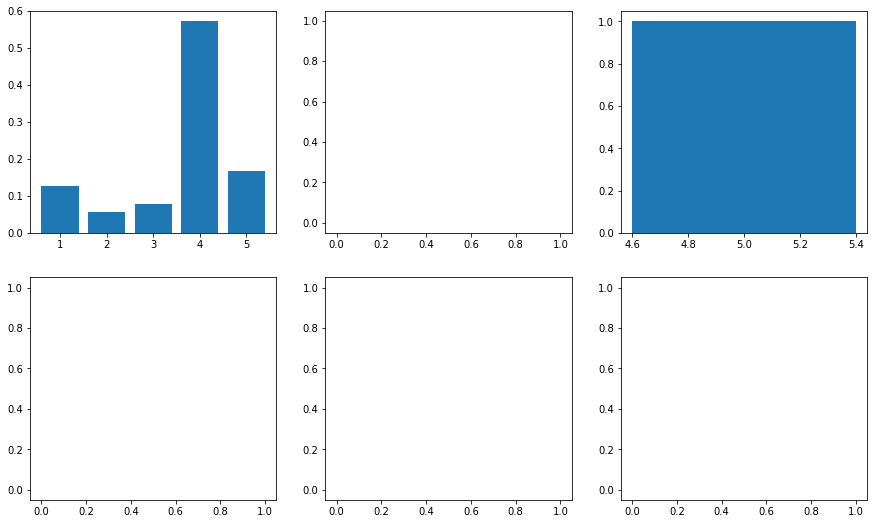

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
count = 0
for i in potentialDupeProducts:
    x = cleanReviews[cleanReviews['ProductId'] == i].Score
    print(i)
    print(x.value_counts())
    print('')
    freqs = frequencies(x)
    probs = probabilities(x, freqs)
    x_axis = list(set(x))
    axes[int(count / 3), int(count%3)].bar(x_axis, probs)
    count += 1

It seems that we have gotten rid of almost all of the reviews with duplicates.

In [33]:
cleanReviews[cleanReviews.ProductId == 'B0012XBD7I']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year,Count
56722,56723,B0012XBD7I,A32NC2UF34RJQY,D. Pagliassotti,0.0,0.0,5.0,2012-10-25 17:00:00,Great for HS lunch,"Great for HS lunch, kid enjoy as a snack also,...",17,3,299,2012,1.0


In [34]:
post = cleanReviews.groupby('ProductId').agg({'Count':'count'}).reset_index()
reviews['Count'] = 1
pre = reviews.groupby('ProductId').agg({'Count':'count'}).reset_index()
print('Before:',pre[pre.Count == 1].shape)
print('After:',post[post.Count == 1].shape)

Before: (30408, 2)
After: (28549, 2)


- Although we did miss a review, it looks like there are too many to fix post-removal. Ideally, we would want a pipeline that identifies products with similar reviews (95%), and then adds it into a list of lists. Then it will go through the list and combine the reviews for every record.

## 2. Let's focus on Product ID now:
    - Look at most popular items (based on number of reviews), how does the distribution look like for reviews?
   

In [35]:
productReviewCount = cleanReviews.groupby('ProductId').agg({'Count':'count'}).reset_index()
productReviewCount.shape

(67770, 2)

In [36]:
top10 = productReviewCount.sort_values('Count', ascending=False).head(10).ProductId.tolist()
top10

['B007JFMH8M',
 'B002QWP89S',
 'B003B3OOPA',
 'B001EO5Q64',
 'B0013NUGDE',
 'B000KV61FC',
 'B000UBD88A',
 'B000NMJWZO',
 'B005K4Q37A',
 'B0090X8IPM']

5.0    623
4.0    217
3.0     56
2.0     12
1.0      4
Name: Score, dtype: int64


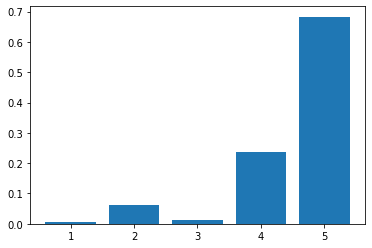

5.0    497
4.0     74
1.0     27
3.0     21
2.0     12
Name: Score, dtype: int64


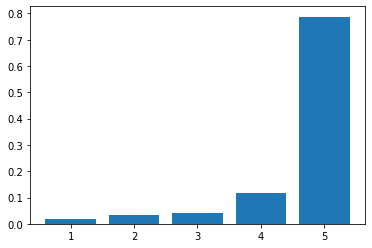

5.0    517
4.0     68
3.0     25
2.0      8
1.0      5
Name: Score, dtype: int64


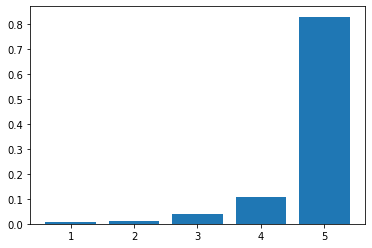

5.0    474
4.0     65
3.0     15
1.0     10
2.0      3
Name: Score, dtype: int64


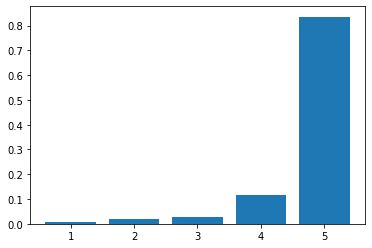

5.0    368
4.0     90
3.0     46
1.0     29
2.0     29
Name: Score, dtype: int64


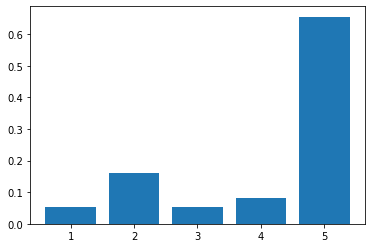

5.0    197
3.0    101
4.0     91
1.0     89
2.0     78
Name: Score, dtype: int64


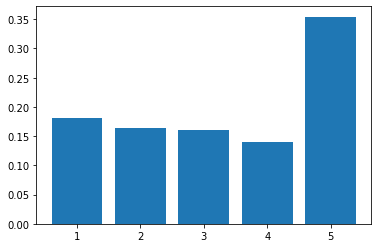

5.0    364
4.0     87
3.0     37
1.0     33
2.0     21
Name: Score, dtype: int64


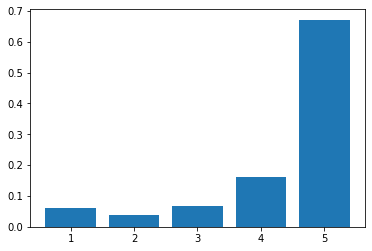

5.0    502
4.0     25
3.0      9
2.0      3
1.0      3
Name: Score, dtype: int64


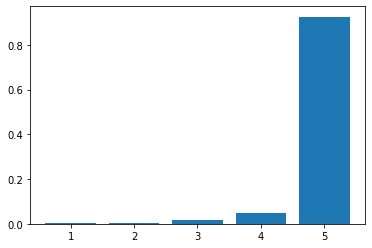

5.0    308
1.0     96
4.0     65
2.0     45
3.0     28
Name: Score, dtype: int64


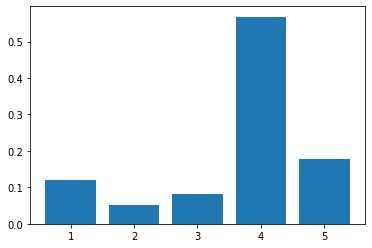

4.0    192
5.0    164
3.0    111
2.0     37
1.0     26
Name: Score, dtype: int64


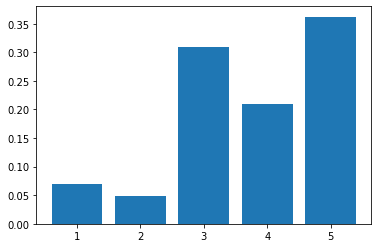

In [37]:
for i in top10:
    x = cleanReviews[cleanReviews['ProductId'] == i].Score
    print(x.value_counts())
    freqs = frequencies(x)
    probs = probabilities(x, freqs)
    x_axis = list(set(x))
    
    plt.bar(x_axis, probs)
    plt.show()

#### Good news, it looks like our top 10 reviews are all unique distributions (unlike the previous situation with duplicate products).

In [38]:
cleanReviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'Hour',
       'Weekday', 'Day', 'Year', 'Count'],
      dtype='object')

In [39]:
potential_dupes = ['B001BCVY4W', 'B001BCVY9W', 'B001BCXTGS', 'B001BDDT8K', 'B001BDDTB2']


### Done with taking care of duplicates!
Why was this an issue?
    - If we want a model to best predict score, it will need to take consideration the productId. If multiple productIds consist of the same reviews, then the model will decrease the weight the productId has on our prediction.
    - However, if we want to simply look at sentiment analysis, then we can essentially only focus on the review Text/Summary and the Score.

## Word Clouds!
### For now, let's change gears and try to use a word cloud to visualize the texts that are most helpful, and least helpful
    - Most helpful can be defined by the highest helpfulness numerator
    - Least helpful can be defined as the highest difference between denominator and numerator

#### Steps:
    1. Find the most helpful review
    2. Find the least helpful review

In [40]:
# Most helpful review search. Using original df as this is purely visual
mostHelpful = reviews.sort_values('HelpfulnessNumerator', ascending=False).head(1)
mostHelpful
# Most helpful review is by User: A1GQGYROVZVW49 for Product: B000FI4O90 with HelpfulnessNumerator: 866.0

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year,Count
190733,190734,B000FI4O90,A1GQGYROVZVW49,P. Schmidt,866,878,5,2006-11-27 16:00:00,Works as Advertised - Classy Product,see update at end of review<br /><br />*******...,16,0,331,2006,1


In [41]:
reviews.iloc[190405]

Id                                                                   190406
ProductId                                                        B000EZQTD8
UserId                                                       A2ITVLVBU8XO8M
ProfileName                                                   Thomas O Kuhn
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                                     1
Time                                                    2011-11-19 16:00:00
Summary                                                    Gristle abounds!
Text                      This jerky has more gristle than I thought was...
Hour                                                                     16
Weekday                                                                   5
Day                                                                     323
Year        

In [42]:
reviews['HelpfulDiff'] = reviews['HelpfulnessDenominator'] - reviews['HelpfulnessNumerator']

In [43]:
leastHelpful = reviews.sort_values('HelpfulDiff', ascending=False).head(1)
leastHelpful
# Least helpful review is by User: A1H6VW0W3UIK0K for Product: B001LUM1ZU with HelpfulDiff: 140.0

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Weekday,Day,Year,Count,HelpfulDiff
470626,470627,B001LUM1ZU,A1H6VW0W3UIK0K,"Tyler Durden ""The first rule of amazon.com is...",5,145,1,2009-05-28 17:00:00,Should be illegal...,As if mayonnaise wasn't unhealthy enough for y...,17,3,148,2009,1,140


In [44]:
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext
cleanReviews.Text = cleanReviews.Text.apply(cleanhtml)

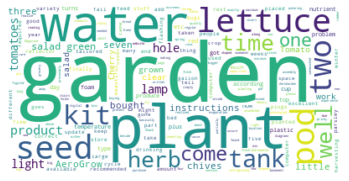

In [45]:
# MOST HELPFUL REVIEW

ID = mostHelpful.Id

text = cleanReviews.Text[int(ID-1)]
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [46]:
print(text)

see update at end of review******************I was lamenting about only having frech lettuce, herbs, chives, and tomatoes from may garden during the long fall-winter-spring parts of the year. The refrigerated stuff from the grocery store goes bad right away and does not taste as good as the fresh stuff from the garden, either.Then I saw a Time Magazine page on the new AeroGrow AeroGarden, and I just had to try it out. After reading the AeroGrow website before making the purchase, I realized that buying one garden would not work for me, as the tomatoes cannot be grown in the same garden as lettuce & herbs. This is partially due to the large amount of room taken up by the tomatoes, and also because the lamp/watering cycle is different and finally because the nutrients are different.So, I bought two gardens, along with the Salad Greens seed kit and Cherry Tomato seed kit. Each garden comes with a mixed herb kit, so I figured to mix in a few herbs with the other seeds, and if they did not 

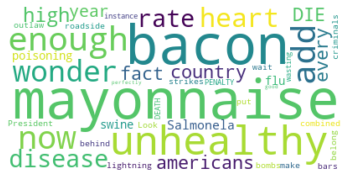

In [47]:
#LEAST HELPFUL WORDCLOUD

ID = leastHelpful.Id

text = cleanReviews.Text[int(ID-1)]
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)


# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now, let's combine all 5 star reviews and all 1 star reviews and compare

In [48]:
fiveStarText = " ".join(review for review in cleanReviews[cleanReviews['Score'] == 5.0].Text)
print ("There are {} words in the combination of 5-star reviews.".format(len(fiveStarText)))

There are 99553699 words in the combination of 5-star reviews.


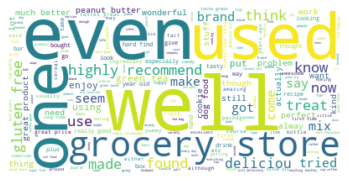

In [49]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(fiveStarText)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [50]:
oneStarText = " ".join(review for review in cleanReviews[cleanReviews['Score'] == 1.0].Text)
print ("There are {} words in the combination of 1-star reviews.".format(len(oneStarText)))

There are 16292397 words in the combination of 1-star reviews.


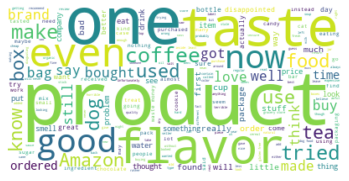

In [51]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(oneStarText)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Note to future self: You have finished going through and cleaning up the past 2 weeks of code. Next:
1. let us explore "Controversial helpfulness"
2. incorporating Michael's great graphs
3. looking further into some trends with Qianti's data (Mean of product reviews over certain years to see if there is a trend)
4. Peer Code Review (comments in the Code Review file)
5. Build a sample prototype for sentiment analysis
    - Input: a review/summary/both from the dataset
    - Output: Binary sentimental results --- positive/negative
    - Compare the model results with actual ratings 
6. Consider neutral reviews (and how we should handle them).
7. Summarize findings/insights in the Insights on Dataset

# Sentiment Analysis - following https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/
1. Associate Positive, Negative, and Neutral Reviews
2. Cleaning data

In [52]:
Sentiment_data = cleanReviews[['Text','Score']] # [[]] double brackets returns a dataframe instead of a series
# could also use to_frame()

In [53]:
Sentiment_data.head(3)

,Text,Score
0,I have bought several of the Vitality canned d...,5.0
1,Product arrived labeled as Jumbo Salted Peanut...,1.0
2,This is a confection that has been around a fe...,4.0


In [54]:
conditions = [
    (Sentiment_data['Score'] > 3),
    (Sentiment_data['Score'] == 3),
    (Sentiment_data['Score'] < 3)]
choices = ['Positive', 'Neutral', 'Negative']
Sentiment_data['Sentiment'] = np.select(conditions, choices)

/Users/nicolasdecavel/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
Sentiment_data.head(5)

,Text,Score,Sentiment
0,I have bought several of the Vitality canned d...,5.0,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,1.0,Negative
2,This is a confection that has been around a fe...,4.0,Positive
3,If you are looking for the secret ingredient i...,2.0,Negative
4,Great taffy at a great price. There was a wid...,5.0,Positive


In [56]:
Sentiment_data1 = pd.concat([Sentiment_data, pd.get_dummies(Sentiment_data.Sentiment)], axis=1, sort=False)

In [57]:
Sentiment_data1.head(5)

,Text,Score,Sentiment,0,Negative,Neutral,Positive
0,I have bought several of the Vitality canned d...,5.0,Positive,0,0,0,1
1,Product arrived labeled as Jumbo Salted Peanut...,1.0,Negative,0,1,0,0
2,This is a confection that has been around a fe...,4.0,Positive,0,0,0,1
3,If you are looking for the secret ingredient i...,2.0,Negative,0,1,0,0
4,Great taffy at a great price. There was a wid...,5.0,Positive,0,0,0,1


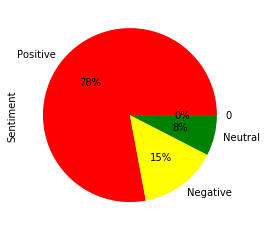

In [58]:
Sentiment_data1.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [59]:
Sentiment_data1.Score.value_counts()

5.0    251705
4.0     56214
1.0     36513
3.0     29839
2.0     20844
4.5         2
Name: Score, dtype: int64

In [60]:
Sentiment_data1.Sentiment.value_counts()

Positive    307921
Negative     57357
Neutral      29839
0                3
Name: Sentiment, dtype: int64

In [61]:
Sentiment_data1.loc[Sentiment_data1['Sentiment'] == '0']

,Text,Score,Sentiment,0,Negative,Neutral,Positive
33958,I only used two maybe three tea bags and got p...,NaN,0,1,0,0,0
237565,This is a cool system only problem is that the...,NaN,0,1,0,0,0
392529,I like the product and tried it before I pucha...,NaN,0,1,0,0,0


In [62]:
pre = Sentiment_data1.shape[0]
Sentiment_data1 = Sentiment_data1[Sentiment_data1['Score'].notna()]
post = Sentiment_data1.shape[0]
print('We deleted', pre-post, 'entries due to NaN values')

We deleted 3 entries due to NaN values


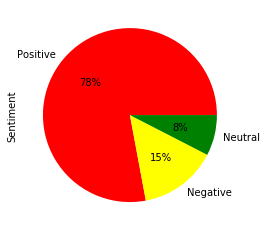

In [63]:
Sentiment_data1.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [64]:
features = Sentiment_data1.iloc[:, 0].values
labels = Sentiment_data1.iloc[:, 2].values
print(labels[0])
print(features[0])

Positive
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [65]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [66]:
# from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
# processed_features = vectorizer.fit_transform(processed_features).toarray()

ModuleNotFoundError: No module named 'sklearn'